# import libraries

In [13]:
# basic libraries

import numpy as np
import pandas as pd
from sklearn.covariance import EmpiricalCovariance, MinCovDet
import sklearn.covariance
from scipy.spatial import distance
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# plotting stuff
import matplotlib.pyplot as plt
import matplotlib as mpl
import collections
import seaborn as sb
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 6

import warnings

# Define directories

In [2]:
in_dir = "/Users/hn/Desktop/Desktop/Kirti/check_point/analogs/"
out_dir = "/Users/hn/Desktop/"

# Read data

In [3]:
all_data_usa = pd.read_csv(in_dir + "all_data_usa.csv")
all_data_usa.head(2)

,year,location,medianDoY,NumLarvaGens_Aug,mean_escaped_Gen1,mean_escaped_Gen2,mean_escaped_Gen3,mean_escaped_Gen4,mean_precip,mean_gdd,treatment,ClimateScenario
0,1979,32.46875_-109.90625,68,2.939262,1.319697,7.080458,1.348167,0.0,300.525,4821.668922,0,observed
1,1979,32.46875_-109.96875,68,2.946050,1.245847,7.104994,1.396980,0.0,303.925,4831.770062,0,observed


# Take numerical part of data
i.e. drop the string columns indication years, locations, etc.

In [4]:
print(list(all_data_usa)) # print makes it horizontal

['year', 'location', 'medianDoY', 'NumLarvaGens_Aug', 'mean_escaped_Gen1', 'mean_escaped_Gen2', 'mean_escaped_Gen3', 'mean_escaped_Gen4', 'mean_precip', 'mean_gdd', 'treatment', 'ClimateScenario']


In [5]:
numeric_feat = ['medianDoY', 'NumLarvaGens_Aug', 'mean_escaped_Gen1', 'mean_escaped_Gen2',
                'mean_escaped_Gen3', 'mean_escaped_Gen4', 'mean_precip', 'mean_gdd']
all_usa_numeric = all_data_usa.loc[:, numeric_feat].copy()

In [6]:
all_usa_numeric.head(2)

,medianDoY,NumLarvaGens_Aug,mean_escaped_Gen1,mean_escaped_Gen2,mean_escaped_Gen3,mean_escaped_Gen4,mean_precip,mean_gdd
0,68,2.939262,1.319697,7.080458,1.348167,0.0,300.525,4821.668922
1,68,2.946050,1.245847,7.104994,1.396980,0.0,303.925,4831.770062


In [7]:
# compute correlation matrix
corr_Mat = all_usa_numeric.corr()

plt.matshow(corr_Mat)
plt.show()

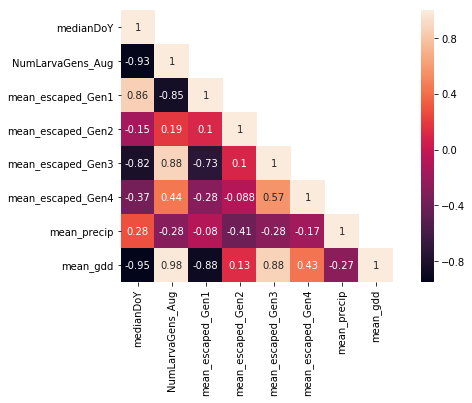

In [8]:
mask = np.array(corr_Mat)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,5)

# the following line can be added to the plot command
# .set_xticklabels(ax.get_xticklabels(), rotation=70) # , vmax=.8
sb.heatmap(corr_Mat, mask=mask, annot=True, square=True); 

In [ ]:
corr_Mat

In [ ]:
print ("condition number of the correlation matrix is {:0.2f}.".format(np.linalg.cond(corr_Mat.values)))
corr_Mat_inv = pd.DataFrame(np.linalg.pinv(corr_Mat.values), corr_Mat.columns, corr_Mat.index)
corr_Mat_inv

# Drop the mean_gdd
The mean_gdd has high correlation with other features, lets drop it and see how it goes

In [ ]:
numeric_feat = ['medianDoY', 'NumLarvaGens_Aug', 'mean_escaped_Gen1', 'mean_escaped_Gen2',
                'mean_escaped_Gen3', 'mean_escaped_Gen4', 'mean_precip']

all_usa_numeric = all_data_usa.loc[:, numeric_feat].copy()
corr_Mat = all_usa_numeric.corr()

In [ ]:
corr_Mat

# Standerdize, mian_max normalize

Scaling, standardizing, the data is already in the definition of correlation, so, scaling would not help that.

### standardize:

numeric_feat = ['medianDoY', 'NumLarvaGens_Aug', 'mean_escaped_Gen1', 'mean_escaped_Gen2',
            'mean_escaped_Gen3', 'mean_escaped_Gen4', 'mean_precip', 'mean_gdd']
all_usa_numeric = all_data_usa.loc[:, numeric_feat].copy()

# standardize
all_usa_numeric = StandardScaler().fit_transform(all_usa_numeric)

# convert back to dataframe
all_usa_numeric = pd.DataFrame(data=all_usa_numeric, columns=features)
all_usa_numeric.head(2)

###############################################################

corr_Mat = all_usa_numeric.corr()
mask = np.array(corr_Mat)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,5)
sb.heatmap(corr_Mat, mask=mask, annot=True, square=True); 
###############################################################

### min max scaling

numeric_feat = ['medianDoY', 'NumLarvaGens_Aug', 'mean_escaped_Gen1', 'mean_escaped_Gen2',
            'mean_escaped_Gen3', 'mean_escaped_Gen4', 'mean_precip', 'mean_gdd']

all_usa_numeric = all_data_usa.loc[:, numeric_feat].copy()

x = all_usa_numeric.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_dt = pd.DataFrame(x_scaled, columns = numeric_feat)
normalized_dt.tail(2)

corr_Mat = all_usa_numeric.corr()
mask = np.array(corr_Mat)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,5)
sb.heatmap(corr_Mat, mask=mask, annot=True, square=True); 

# Apply PCA

In [ ]:
numeric_feat = ['medianDoY', 'NumLarvaGens_Aug', 'mean_escaped_Gen1', 'mean_escaped_Gen2',
            'mean_escaped_Gen3', 'mean_escaped_Gen4', 'mean_precip', 'mean_gdd']

all_usa_numeric = all_data_usa.loc[:, numeric_feat].copy()
all_usa_numeric.head(2)

In [ ]:
## min_max scaling

all_usa_numeric = all_usa_numeric.values
min_max_scaler = preprocessing.MinMaxScaler()
all_usa_scaled = min_max_scaler.fit_transform(all_usa_numeric)
all_usa_scaled = pd.DataFrame(all_usa_scaled, columns=numeric_feat)
all_usa_scaled.head(2)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(all_usa_scaled)

principal_Df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])
principal_Df.head(2)

In [11]:
all_data_usa.head(2)

,year,location,medianDoY,NumLarvaGens_Aug,mean_escaped_Gen1,mean_escaped_Gen2,mean_escaped_Gen3,mean_escaped_Gen4,mean_precip,mean_gdd,treatment,ClimateScenario
0,1979,32.46875_-109.90625,68,2.939262,1.319697,7.080458,1.348167,0.0,300.525,4821.668922,0,observed
1,1979,32.46875_-109.96875,68,2.946050,1.245847,7.104994,1.396980,0.0,303.925,4831.770062,0,observed


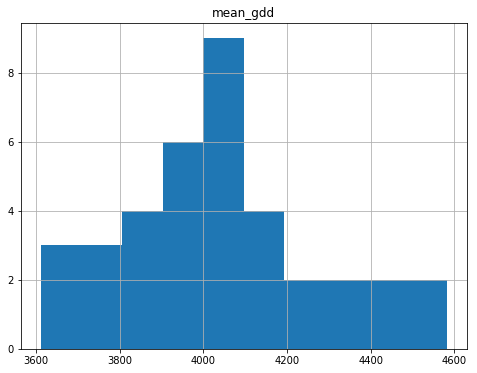

In [12]:
one_loc = all_data_usa[all_data_usa['location'] == all_data_usa['location'][3]]
one_loc.hist(column="mean_gdd");

In [ ]:
all_data_usa['location'][0:10]

In [ ]:
two_locs = all_data_usa[all_data_usa['location'].isin(all_data_usa['location'][0:20])];
two_locs.hist(column="mean_gdd", by='location');

In [ ]:
all_data_usa.hist(column="mean_gdd", by='location');

In [ ]:
all_data_usa.hist(column="mean_precip", by='location');

In [ ]:
(two_locs.location.unique())

In [ ]:
numeric_feat = ['medianDoY', 'NumLarvaGens_Aug', 'mean_escaped_Gen1', 'mean_escaped_Gen2',
                    'mean_escaped_Gen3', 'mean_escaped_Gen4', 'mean_precip', 'mean_gdd']
two_locs_numeric = two_locs.loc[:, numeric_feat].copy()

In [ ]:
mahalanobis(two_locs_numeric)

In [ ]:
all_data_usa['location'][3]

In [16]:
one_loc = all_data_usa[all_data_usa['location'] == all_data_usa['location'][3]]
one_loc_numeric = one_loc.loc[:, numeric_feat].copy()

In [ ]:
cov_mat = one_loc_numeric.cov()
cov_mat_inv = pd.DataFrame(np.linalg.pinv(cov_mat.values), cov_mat.columns, cov_mat.index)
distance.mahalanobis(two_locs_numeric.iloc[0], two_locs_numeric.iloc[1], cov_mat_inv)

In [ ]:
cov_mat_inv.head(2)

In [ ]:
cov_mat.head()

In [22]:

# robust_cov = MinCovDet().fit(one_loc_numeric)


In [ ]:
.mahalanobis(two_locs_numeric)

In [26]:
# the following two are the same
# emp_cov = EmpiricalCovariance(assume_centered=False).fit(one_loc_numeric)
cov1 = sklearn.covariance.empirical_covariance(one_loc_numeric, assume_centered=False)

In [18]:
cov_mat = one_loc_numeric.cov()

In [19]:
cov_mat

,medianDoY,NumLarvaGens_Aug,mean_escaped_Gen1,mean_escaped_Gen2,mean_escaped_Gen3,mean_escaped_Gen4,mean_precip,mean_gdd
medianDoY,89.966967,-0.497214,7.959176,-2.734734,-1.778149,0.0,-178.902665,-372.218799
NumLarvaGens_Aug,-0.497214,0.051314,-0.227882,0.225695,0.153484,0.0,-34.078361,50.435823
mean_escaped_Gen1,7.959176,-0.227882,1.844587,-1.191666,-0.729027,0.0,82.063865,-218.746729
mean_escaped_Gen2,-2.734734,0.225695,-1.191666,1.221550,0.650004,0.0,-150.634884,227.090713
mean_escaped_Gen3,-1.778149,0.153484,-0.729027,0.650004,0.528542,0.0,-74.831000,152.210046
mean_escaped_Gen4,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
mean_precip,-178.902665,-34.078361,82.063865,-150.634884,-74.831000,0.0,118121.824799,-31709.717167
mean_gdd,-372.218799,50.435823,-218.746729,227.090713,152.210046,0.0,-31709.717167,59929.229252
